In [1]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Import the data from DataCamp website
df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/444cdbf175d5fbf564b564bd36ac21740627a834/diabetes.csv')

# Simple EDA

In [3]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

Appear to be no missing values

# Graphical EDA

In [6]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

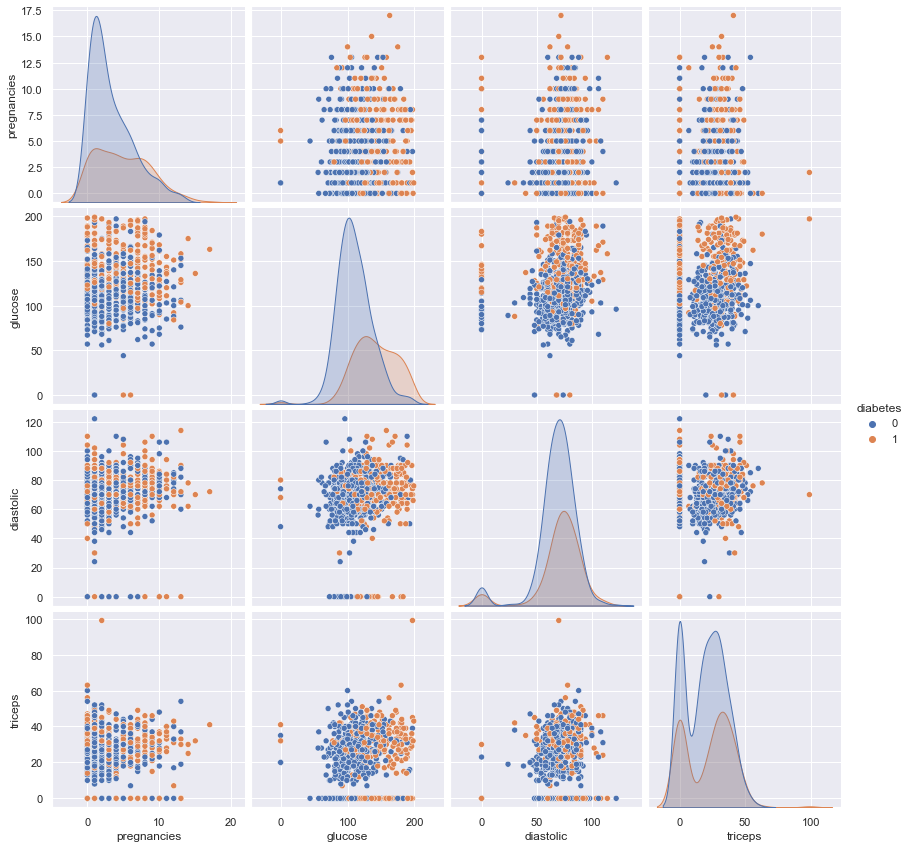

In [7]:
# Plot out a pairplot for four columns vs. predictor of 'diabetes'
sns.set_theme()
excol = ['insulin', 'bmi','dpf', 'age']
df1 = df.drop(excol, axis=1)
sns.pairplot(df1, hue='diabetes', height=3)

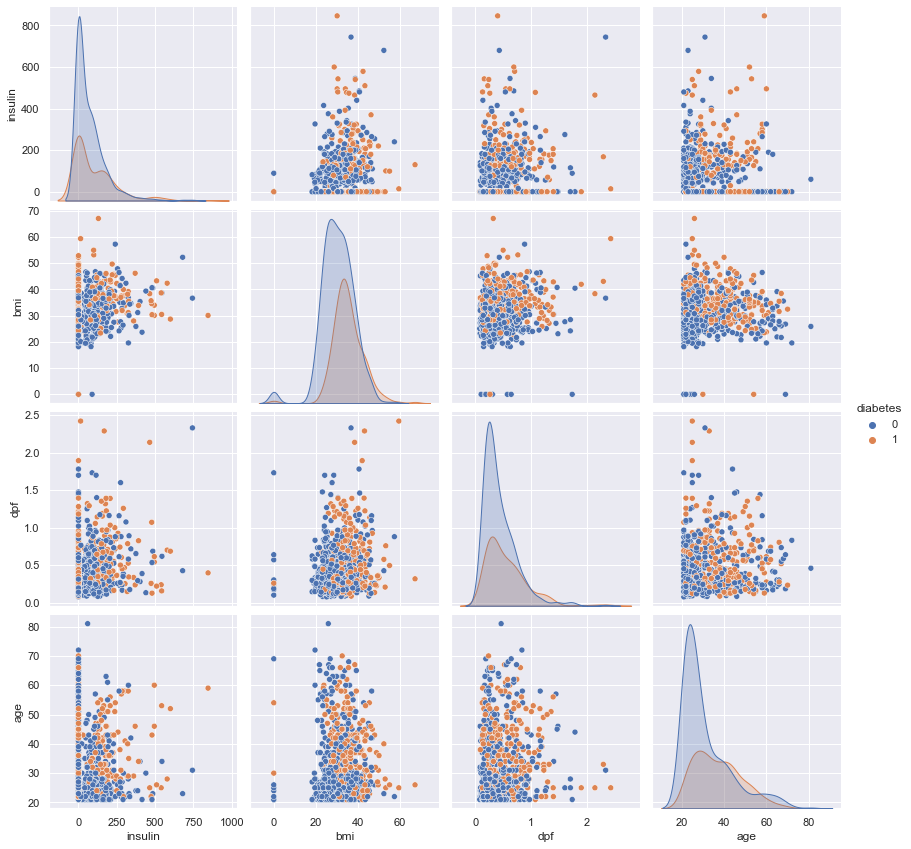

In [8]:
# Plot out a pairplot for the remaining four columns vs. predictor of 'diabetes'
excol2 = ['pregnancies', 'glucose', 'diastolic', 'triceps']
df2 = df.drop(excol2, axis=1)
sns.pairplot(df2, hue='diabetes', height=3)

From the pairplots we can see that several features have values of zero (glucose, diastolic, triceps, insulin and bmi) which makes no sense in the real world. So we should consider these missing values and deal with them before we move on.

# Handle missing data

In [9]:
# First let's set all zero values to 'NaN' so we can better deal with them
df.replace({'glucose': 0, 'diastolic': 0, 'triceps': 0, 'insulin': 0, 'bmi': 0}, np.nan, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      763 non-null    float64
 2   diastolic    733 non-null    float64
 3   triceps      541 non-null    float64
 4   insulin      394 non-null    float64
 5   bmi          757 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
# If we drop all the missing data rows
df_drop = df.dropna()
df_drop.shape

(392, 9)

We would lose about half our data if we just drop rows with Nan values - which is unacceptable!
So we will use an impute method from sklearn to replace these values with the mean of each feature instead.

# Impute missing values with a pipeline

In [20]:
# Import dependencies
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [21]:
# Instantiate the imputer object
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [30]:
# Instantiate the logreg object
logreg = LogisticRegression(max_iter=1000)

In [31]:
# Build the pipeline object
steps = [('imputation', imp), ('logistic_regression', logreg)]

In [32]:
# Pass the steps list into the pipeline constructor
pipeline = Pipeline(steps)

# Create feature and target variable arrays

In [33]:
# The target variable is 'diabetes'
X_preshape = df.drop('diabetes', axis=1).values
y_preshape = df.diabetes.values

X = X_preshape.reshape(-1,8)
y = y_preshape.reshape(-1,1)

print(f" X shape: {X.shape}")
print(f" y shape: {y.shape}")

 X shape: (768, 8)
 y shape: (768, 1)


In [34]:
# Split the data into traing and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Fit the model, predict and score
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7402597402597403

<AxesSubplot:>

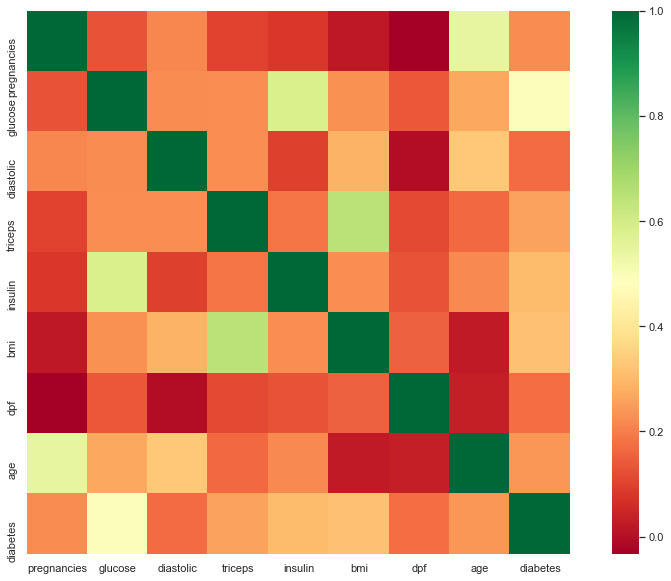

In [39]:
# Examine a Pearson's correlation matrix between the features of the dataset and the predictor 'diabetes'
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

# K Nearest Neighbors (knn) classifier

In [ ]:
# Instantiate the knn Classifier
knn = KNeighborsClassifier(n_neighbors=8)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.4, random_state=42)

In [ ]:
knn.fit(X_train, np.ravel(y_train))

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

# Logistic Regression classifier

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [ ]:
# Create the classifier: logreg
logreg = LogisticRegression(max_iter=1000)

In [ ]:
y_train_1d = y_train.ravel()
y_train_fixed = np.array(y_train_1d).astype(int)

In [ ]:
# Fit the classifier to the training data
logreg.fit(X_train, np.ravel(y_train))

In [ ]:
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

In [ ]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(15,15))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# AUC computation - Area under the curve of an ROC curve

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [ ]:
# Compute and print AUC score
print(f"AUC: {roc_auc_score(y_test, y_pred_prob)}")

In [ ]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, np.ravel(y), cv=5, scoring='roc_auc')

In [ ]:
# Print list of AUC scores
print(f"AUC scores computed using 5-fold cross-validation: {cv_auc}")

# Hyperparameter tuning with GridSearchCV

In [ ]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [ ]:
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=1000)

In [ ]:
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

In [ ]:
# Fit it to the data
logreg_cv.fit(X, np.ravel(y))

In [ ]:
# Print the tuned parameters and score
print(f"Tuned Logistic Regression Parameters: {logreg_cv.best_params_}") 
print(f"Best score is {logreg_cv.best_score_}")

We find that a hyperparameter of 'C' = 0.00611 yields the best performance

# Hyperparameter tuning with RandomizedSearchCV and decision trees

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [ ]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

In [ ]:
# Fit it to the data
tree_cv.fit(X, y)


In [ ]:
# Print the tuned parameters and score
print(f"Tuned Decision Tree Parameters: {tree_cv.best_params_}")
print(f"Best score is {tree_cv.best_score_}")

# Hold-out set using LogisticRegression

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l2']}

In [ ]:
# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=1000)

In [ ]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

In [ ]:
# Fit it to the training data
logreg_cv.fit(X_train, np.ravel(y_train))

In [ ]:
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))